In [47]:
import cv2
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import h5py

In [60]:
df = pd.read_csv\
('/green-projects/project-sonyc_redhook/workspace/share/redhook-analysis/output/max_dataframe_cut.csv')

In [61]:
df.head()

,Unnamed: 0,start_timestamp,frame,actual_timestamp,area,probability
0,10,1573061868,648,1573061911,276490,0.988503
1,32,1573830164,72,1573830168,207648,0.995947
2,45,1573830164,1518,1573830265,294148,0.969995
3,64,1573830554,72,1573830558,103700,0.983073
4,70,1573830554,190,1573830566,122512,0.977682


In [67]:
df.iloc[0]['start_timestamp']

1573061868.0

In [50]:
def show_frame(video_file, frame_number):
    vid_obj = cv2.VideoCapture(video_file)
    vid_obj.set(cv2.CAP_PROP_POS_FRAMES, frame_number)
    res, frame = vid_obj.read()
    if res:
        cropped_frame = frame[200:850, 1100:1750]
        return cropped_frame
    else:
        return False

In [51]:
test_img_arr = [np.asarray(show_frame('/green-projects/project-sonyc_redhook/workspace/share/original_video/' \
               + str(int(df.iloc[x]['start_timestamp'])) + '.ts', df.iloc[x]['frame']).tolist()) for x in df.index[:10]]

In [52]:
# show_frame('/green-projects/project-sonyc_redhook/workspace/share/original_video/' \
#                + str(int(df.iloc[0]['start_timestamp'])) + '.ts', df.iloc[0]['frame']).tolist()

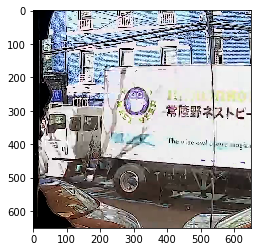

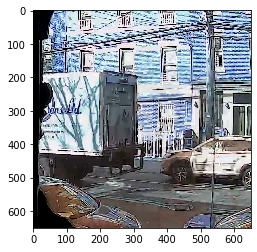

In [53]:
for x in test_img_arr[4:6]:
    plt.imshow(x)
    plt.show()

In [54]:
len(test_img_arr)

10

In [69]:
test_img_arr[0]

array([[[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [179, 183, 217],
        [160, 162, 196],
        [144, 146, 180]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [236, 240, 255],
        [215, 217, 251],
        [188, 190, 224]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [213, 219, 255],
        [227, 230, 255],
        [214, 217, 255]],

       ...,

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]]

In [ ]:
img_arr = [show_frame('/green-projects/project-sonyc_redhook/workspace/share/original_video/' \
               + str(int(df.iloc[x]['start_timestamp'])) + '.ts', df.iloc[x]['frame']) for x in df.index]

In [25]:
h5 = h5py.File\
('/green-projects/project-sonyc_redhook/workspace/share/redhook-analysis/output/max_dataframe_img.hdf5', 'r')

In [30]:
df = h5['df']

In [33]:
list(df.keys())

['axis0',
 'axis1',
 'block0_items',
 'block0_values',
 'block1_items',
 'block1_values',
 'block2_values']

In [45]:
list(df['axis0'])

[b'Unnamed: 0',
 b'start_timestamp',
 b'frame',
 b'actual_timestamp',
 b'area',
 b'probability',
 b'image']

In [5]:
df_img.head()

,Unnamed: 0,Unnamed: 0.1,start_timestamp,frame,actual_timestamp,area,probability,image
0,0,10,1573061868,648,1573061911,276490,0.988503,[[[ 0 0 0]\n [ 0 0 0]\n [ 0 0 ...
1,1,16,1573061868,660,1573061912,153846,0.974143,[[[ 0 0 0]\n [ 0 0 0]\n [ 0 0 ...
2,2,20,1573061868,722,1573061916,119448,0.849568,[[[ 0 0 0]\n [ 0 0 0]\n [ 0 0 ...
3,3,32,1573830164,72,1573830168,207648,0.995947,[[[ 0 0 0]\n [ 0 0 0]\n [ 0 0 ...
4,4,45,1573830164,1518,1573830265,294148,0.969995,[[[ 0 0 0]\n [ 0 0 0]\n [ 0 0 ...


In [8]:
df_img.dtypes

Unnamed: 0            int64
Unnamed: 0.1          int64
start_timestamp       int64
frame                 int64
actual_timestamp      int64
area                  int64
probability         float64
image                object
dtype: object

In [25]:
np.fromstring(df_img['image'][0], dtype=float, sep=' ')

array([], dtype=float64)

In [26]:
df_img['image'][0]

'[[[  0   0   0]\n  [  0   0   0]\n  [  0   0   0]\n  ...\n  [179 183 217]\n  [160 162 196]\n  [144 146 180]]\n\n [[  0   0   0]\n  [  0   0   0]\n  [  0   0   0]\n  ...\n  [236 240 255]\n  [215 217 251]\n  [188 190 224]]\n\n [[  0   0   0]\n  [  0   0   0]\n  [  0   0   0]\n  ...\n  [213 219 255]\n  [227 230 255]\n  [214 217 255]]\n\n ...\n\n [[  0   0   0]\n  [  0   0   0]\n  [  0   0   0]\n  ...\n  [  0   0   0]\n  [  0   0   0]\n  [  0   0   0]]\n\n [[  0   0   0]\n  [  0   0   0]\n  [  0   0   0]\n  ...\n  [  0   0   0]\n  [  0   0   0]\n  [  0   0   0]]\n\n [[  0   0   0]\n  [  0   0   0]\n  [  0   0   0]\n  ...\n  [  0   0   0]\n  [  0   0   0]\n  [  0   0   0]]]'

In [2]:
def annotate_img(img, annotation_list):
    #display img
    plt.imshow(img)
    plt.show()
    #truck or no?
    annotation = input("Press y if the image shows a truck, and n if not: ")
    #add answer to annotation_list
    annotation_list.append(annotation)

In [3]:
test_annotation_list = []

In [4]:
# for i in test_img_arr[:20]:
#     annotate_img(i, test_annotation_list)

In [16]:
df.head(12)

,Unnamed: 0,start_timestamp,frame,actual_timestamp,area,probability
0,10,1573061868,648,1573061911,276490,0.988503
1,16,1573061868,660,1573061912,153846,0.974143
2,20,1573061868,722,1573061916,119448,0.849568
3,32,1573830164,72,1573830168,207648,0.995947
4,45,1573830164,1518,1573830265,294148,0.969995
5,64,1573830554,72,1573830558,103700,0.983073
6,70,1573830554,190,1573830566,122512,0.977682
7,74,1573830554,948,1573830617,120000,0.924872
8,86,1573064006,1004,1573064072,65682,0.964587
9,92,1573065027,22,1573065028,172546,0.979907
